In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:,:2]
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Decision Tree":DecisionTreeClassifier(max_depth=3),
    "Random Forest":RandomForestClassifier(n_estimators=50),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [ ]:
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  print(f"{name} Accuracy: {acc:.4f}")
  print(classification_report(y_test,y_pred,target_names=iris.target_names))

Decision Tree Accuracy: 0.8333
              precision    recall  f1-score   support

      setosa       1.00      0.90      0.95        10
  versicolor       0.75      0.67      0.71         9
   virginica       0.77      0.91      0.83        11

    accuracy                           0.83        30
   macro avg       0.84      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

Random Forest Accuracy: 0.8000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.67      0.67      0.67         9
   virginica       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30

KNN Accuracy: 0.8000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.67      0.67      0.67   

In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set1)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.title(title)
    plt.show()


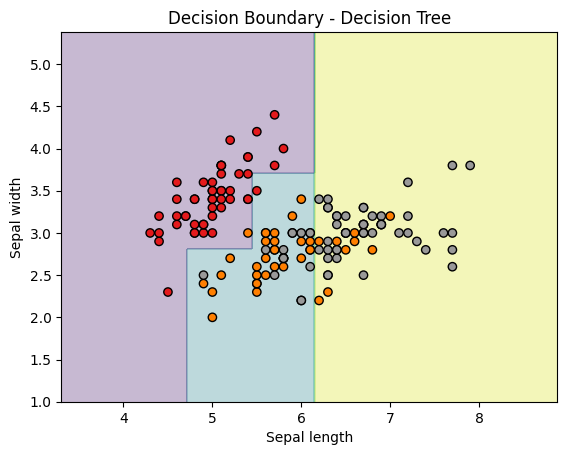

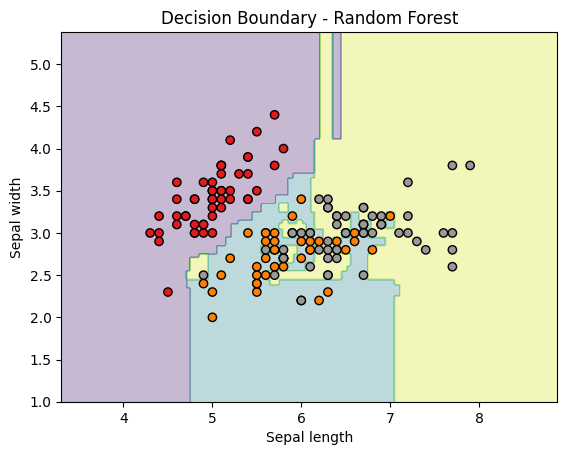

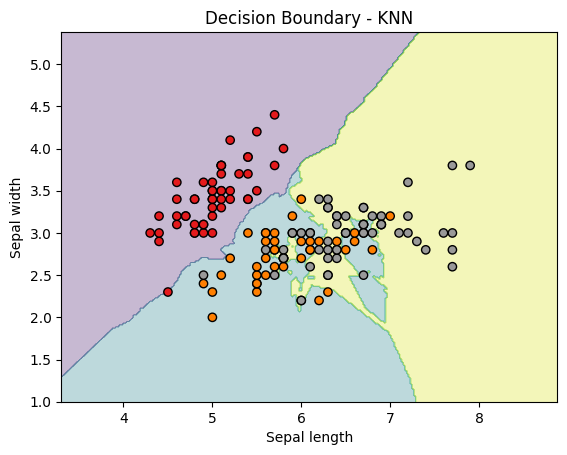

In [ ]:
for name, model in models.items():
    plot_decision_boundary(model, X, y, f"Decision Boundary - {name}")